# Bangla Fake News Detection

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import seaborn as sns

In [43]:
df = pd.read_csv('/kaggle/input/bangla-and-english-fake-news-dataset/final_bn_data.csv')

In [44]:
df.head()

,category,headline,content,label
0,National,৮ দিনে ১৮ বিল পাস!,দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যাচ্ছে। কার্যত ...,0.0
1,Sports,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড,একাদশ জাতীয় সংসদ নির্বাচনকে সামনে রেখে সাংগঠনি...,0.0
2,National,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে,গাজীপুরে জোড়া খুন মামলার প্রধান আসামি মাদ্রাসা...,0.0
3,Sports,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ,সাফ অনূর্ধ্ব-১৮ নারী ফুটবল চ্যাম্পিয়নশিপে নেপা...,1.0
4,National,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার,কুড়িগ্রাম প্রতিনিধি : কুড়িগ্রাম সদর উপজেলার বে...,1.0


# Exploring Dataset

In [45]:
df.isnull().sum()

category    0
headline    0
content     0
label       0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
df.shape

(14537, 4)

In [48]:
df['content1'] = df['headline']+' '+df['content']

In [49]:
df.head()

,category,headline,content,label,content1
0,National,৮ দিনে ১৮ বিল পাস!,দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যাচ্ছে। কার্যত ...,0.0,৮ দিনে ১৮ বিল পাস! দশম জাতীয় সংসদের মেয়াদ শেষ ...
1,Sports,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড,একাদশ জাতীয় সংসদ নির্বাচনকে সামনে রেখে সাংগঠনি...,0.0,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড এ...
2,National,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে,গাজীপুরে জোড়া খুন মামলার প্রধান আসামি মাদ্রাসা...,0.0,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে...
3,Sports,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ,সাফ অনূর্ধ্ব-১৮ নারী ফুটবল চ্যাম্পিয়নশিপে নেপা...,1.0,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ সাফ অ...
4,National,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার,কুড়িগ্রাম প্রতিনিধি : কুড়িগ্রাম সদর উপজেলার বে...,1.0,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার কুড়িগ্রাম ...


In [50]:
df['content1'][1]

'আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড একাদশ জাতীয় সংসদ নির্বাচনকে সামনে রেখে সাংগঠনিক সফরে ফেনী যাচ্ছেন আওয়ামী লীগের কেন্দ্রীয় নেতারা। দলের সাধারণ সম্পাদক এবং সড়ক পরিবহন ও সেতুমন্ত্রী ওবায়দুল কাদের সফর টিমের নেতৃত্বে রয়েছেন। এ উপলক্ষে ফেনী শহরের ট্রাংক রোড এলাকায় জনসভার আয়োজন করেছে ফেনী জেলা আওয়ামী লীগ।\xa0 শনিবার (২২ সেপ্টেম্বর) বেলা ১টা থেকে জনসভাস্থলে আসতে শুরু করেন নেতাকর্মীরা। বিকেল ৩টা থেকে লোকে লোকারণ্য হয়ে যায় ট্রাংক রোড, জেল রোড, এসএসকে রোডসহ শহরের প্রধান সড়কগুলো।\xa0 শহরের ট্রাংক রোডের কেন্দ্রীয় শহীদ মিনারে জনসভায় প্রধান অতিথি হিসেবে থাকবেন সেতুমন্ত্রী। নেতাকর্মীরা অধীর আগ্রহে আছেন কখন নেতা আসবে।\xa0 নির্বাচনকে সামনে রেখে মনোনয়ন টিকিট পেতে নেতারা যখন মাঠ চষে বেড়াচ্ছেন ঠিক তখনি নির্বাচনের আগ মুহূর্তে এ জনসভায় কী বার্তা আসে এ নিয়ে দলীয় নেতাকর্মী ছাড়াও রাজনৈতিক মহলে নানা আলোচনা চলছে।\xa0 দলীয় সূত্র জানায়, দলের সাধারণ সম্পাদক নির্বাচিত হওয়ার পর আওয়ামী লীগ সাধারণ সম্পাদক ওবায়দুল কাদের ফেনীতে বিভিন্ন উন্নয়ন কার্যক্রম পরিদর্শন ও দলের ঘরোয়া মিটিংয়ে অংশ নিলেও তার উপস্থিতিতে এব

In [51]:
df.drop(['category','headline','content'],axis=1,inplace=True)

In [52]:
df.head()

,label,content1
0,0.0,৮ দিনে ১৮ বিল পাস! দশম জাতীয় সংসদের মেয়াদ শেষ ...
1,0.0,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড এ...
2,0.0,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে...
3,1.0,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ সাফ অ...
4,1.0,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার কুড়িগ্রাম ...


# Creating new feature to visualize data

In [53]:
df['num_char'] = df['content1'].apply(len)

In [54]:
df.head()

,label,content1,num_char
0,0.0,৮ দিনে ১৮ বিল পাস! দশম জাতীয় সংসদের মেয়াদ শেষ ...,2872
1,0.0,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড এ...,1883
2,0.0,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে...,1202
3,1.0,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ সাফ অ...,699
4,1.0,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার কুড়িগ্রাম ...,1070


In [55]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
df['word'] = df['content1'].apply(lambda x:len(nltk.word_tokenize(x)))

In [57]:
df['sentence'] = df['content1'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [58]:
df.head()

,label,content1,num_char,word,sentence
0,0.0,৮ দিনে ১৮ বিল পাস! দশম জাতীয় সংসদের মেয়াদ শেষ ...,2872,478,2
1,0.0,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড এ...,1883,310,1
2,0.0,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে...,1202,196,5
3,1.0,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ সাফ অ...,699,99,1
4,1.0,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার কুড়িগ্রাম ...,1070,172,2


# visualize corelation

In [59]:
new_df = df[df['label']==1][['num_char','word','sentence']]
stats = new_df.describe()

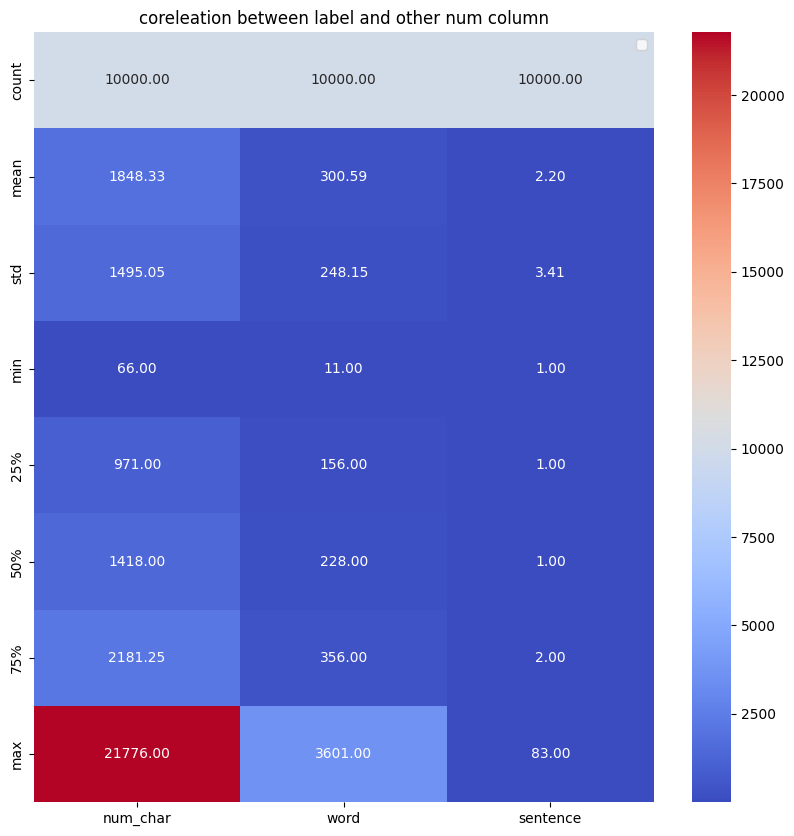

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(stats, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('coreleation between label and other num column')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


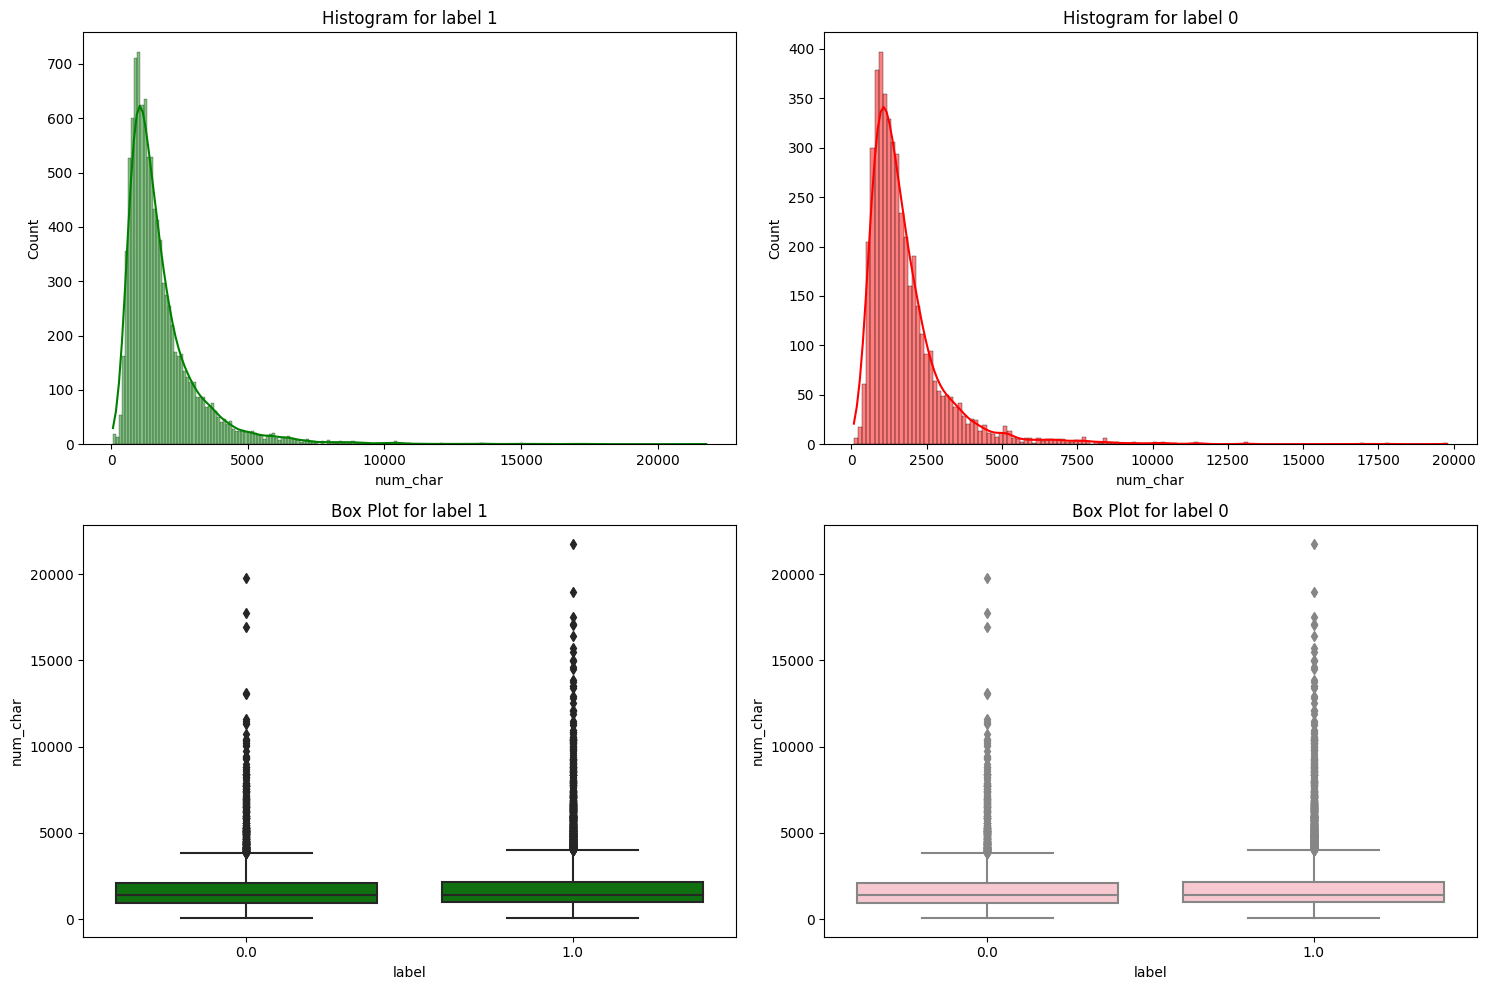

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Histogram for Sentiment 1
sns.histplot(df[df['label'] == 1]['num_char'], ax=axes[0, 0], color='green', kde=True)
axes[0, 0].set_title('Histogram for label 1')

# Histogram for Sentiment 0
sns.histplot(df[df['label'] == 0]['num_char'], ax=axes[0, 1], color='red', kde=True)
axes[0, 1].set_title('Histogram for label 0')

# Box plot for Sentiment 1
sns.boxplot(x='label', y='num_char', data=df, ax=axes[1, 0], palette=['green'])
axes[1, 0].set_title('Box Plot for label 1')

# Box plot for Sentiment 0
sns.boxplot(x='label', y='num_char', data=df, ax=axes[1, 1], palette=['pink'])
axes[1, 1].set_title('Box Plot for label 0')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


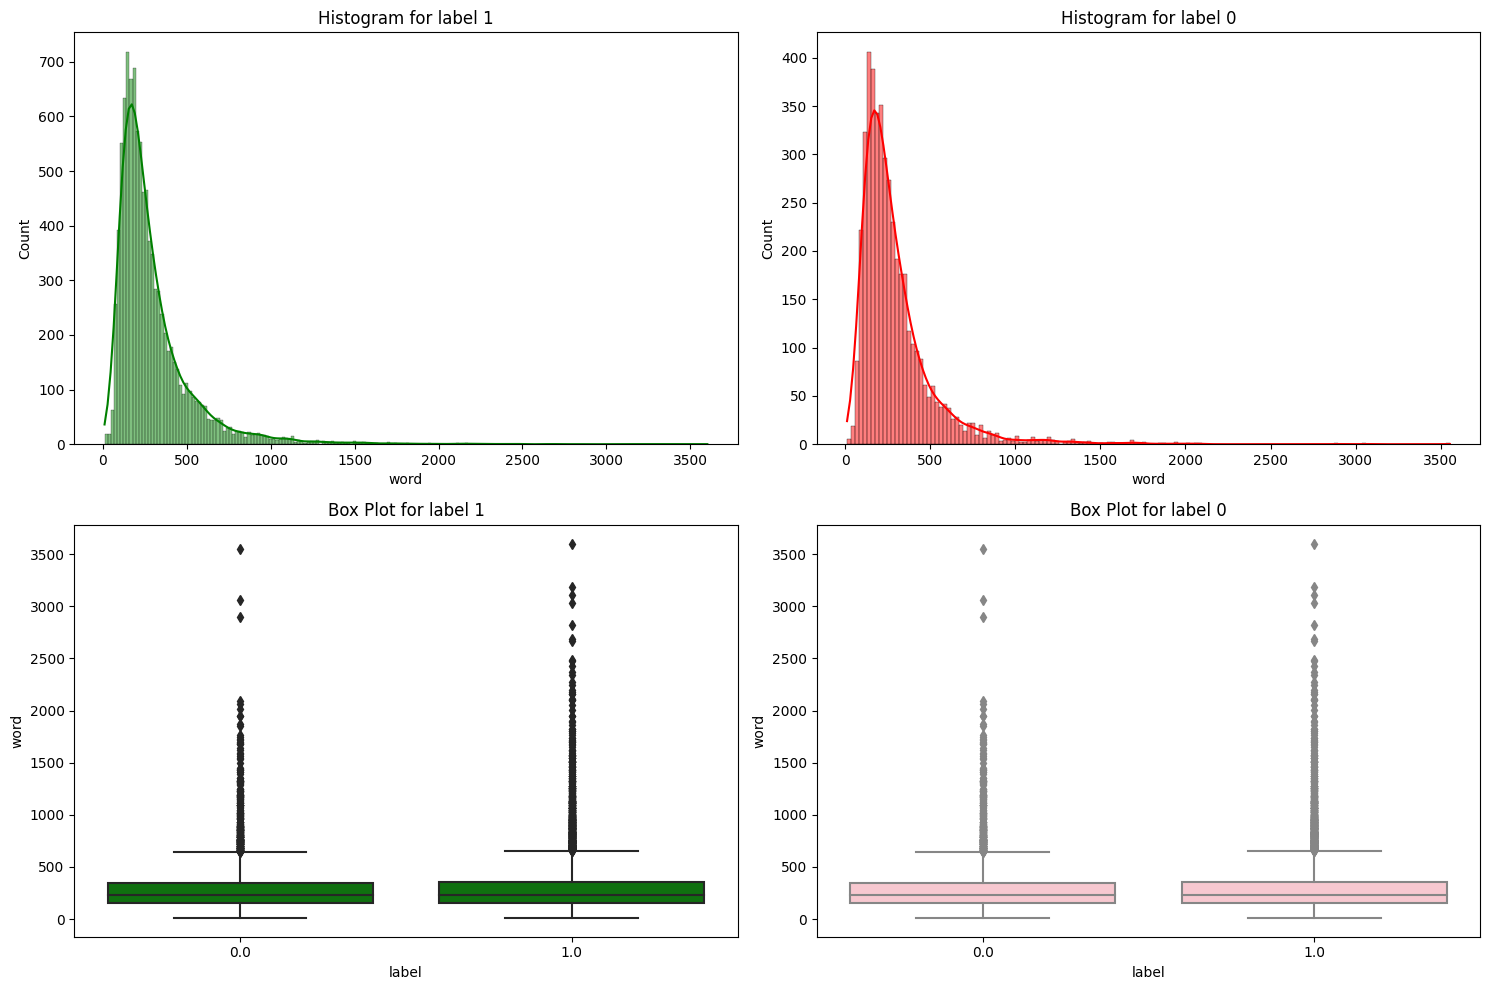

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Histogram for Sentiment 1
sns.histplot(df[df['label'] == 1]['word'], ax=axes[0, 0], color='green', kde=True)
axes[0, 0].set_title('Histogram for label 1')

# Histogram for Sentiment 0
sns.histplot(df[df['label'] == 0]['word'], ax=axes[0, 1], color='red', kde=True)
axes[0, 1].set_title('Histogram for label 0')

# Box plot for Sentiment 1
sns.boxplot(x='label', y='word', data=df, ax=axes[1, 0], palette=['green'])
axes[1, 0].set_title('Box Plot for label 1')

# Box plot for Sentiment 0
sns.boxplot(x='label', y='word', data=df, ax=axes[1, 1], palette=['pink'])
axes[1, 1].set_title('Box Plot for label 0')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


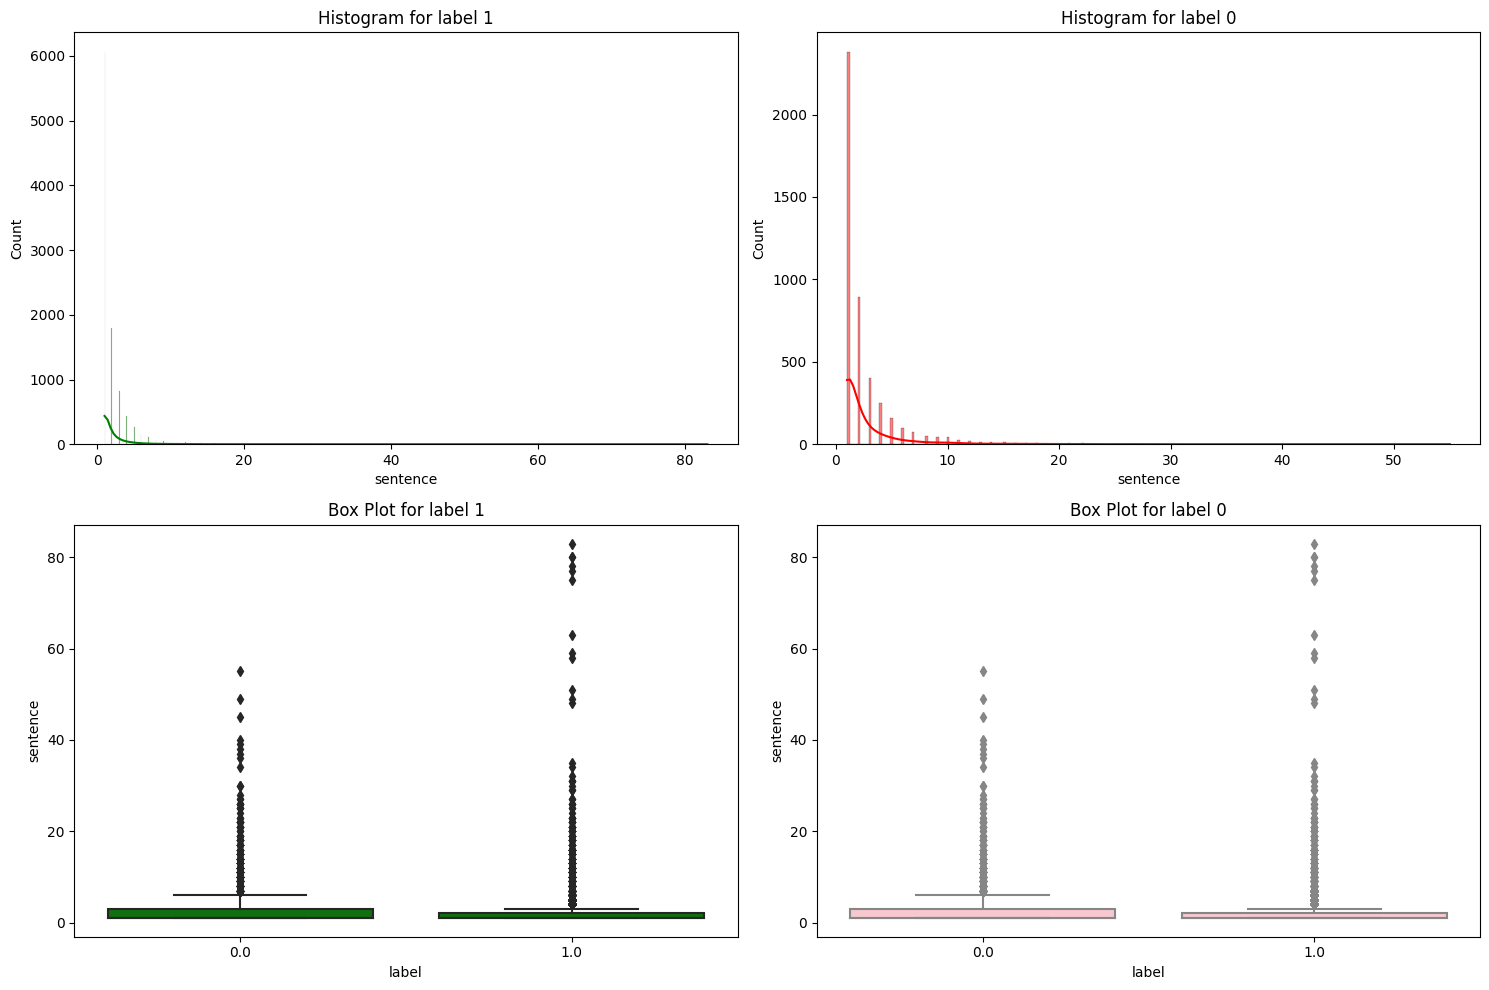

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Histogram for Sentiment 1
sns.histplot(df[df['label'] == 1]['sentence'], ax=axes[0, 0], color='green', kde=True)
axes[0, 0].set_title('Histogram for label 1')

# Histogram for Sentiment 0
sns.histplot(df[df['label'] == 0]['sentence'], ax=axes[0, 1], color='red', kde=True)
axes[0, 1].set_title('Histogram for label 0')

# Box plot for Sentiment 1
sns.boxplot(x='label', y='sentence', data=df, ax=axes[1, 0], palette=['green'])
axes[1, 0].set_title('Box Plot for label 1')

# Box plot for Sentiment 0
sns.boxplot(x='label', y='sentence', data=df, ax=axes[1, 1], palette=['pink'])
axes[1, 1].set_title('Box Plot for label 0')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [64]:
!pip install bnlp_toolkit
!pip install banglanltk

  Obtaining dependency information for bnlp_toolkit from https://files.pythonhosted.org/packages/af/99/5d688fc2e5f6494d6c0a4e6bcdc8192266869caeef3b41dbc3dc8358616d/bnlp_toolkit-4.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for ftfy from https://files.pythonhosted.org/packages/91/f8/dfa32d06cfcbdb76bc46e0f5d69c537de33f4cedb1a15cd4746ab45a6a26/ftfy-6.1.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for wcwidth<0.3.0,>=0.2.12 from https://files.pythonhosted.org/packages/31/b1/a59de0ad3aabb17523a39804f4c6df3ae87ead053a4e25362ae03d73d03a/wcwidth-0.2.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for python-crfsuite>=0.8.3 from https://files.pythonhosted.org/packages/38/1d/c475ba7d11e9735f00eb08e2f5315aa2e21c24cc85a0474c3fd425edef58/python_crfsuite-0.9.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86

In [65]:
import bnlp
import banglanltk
from bnlp import BengaliCorpus as corpus

In [66]:
def clean_the_text(text):
    sent = banglanltk.clean_text(text)
    tokens = banglanltk.word_tokenize(sent)
    word = [token for token in tokens if token not in corpus.punctuations]
    return " ".join(word)

In [67]:
df['content']= df['content1'].apply(clean_the_text)

In [68]:
df.head()

,label,content1,num_char,word,sentence,content
0,0.0,৮ দিনে ১৮ বিল পাস! দশম জাতীয় সংসদের মেয়াদ শেষ ...,2872,478,2,৮ দিনে ১৮ বিল পাস দশম জাতীয় সংসদের মেয়াদ শেষ হ...
1,0.0,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড এ...,1883,310,1,আলীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড এক...
2,0.0,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে...,1202,196,5,মাদ্রাসায় জোড়া খুন পরিচালক তিন দিনের রিমান্ডে ...
3,1.0,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ সাফ অ...,699,99,1,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ সাফ অ...
4,1.0,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার কুড়িগ্রাম ...,1070,172,2,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার কুড়িগ্রাম ...


In [69]:
df['content'][0]

'৮ দিনে ১৮ বিল পাস দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যাচ্ছে কার্যত আর মাত্র একটি অধিবেশনই রয়েছে বর্তমান সরকারের অক্টোবরের মাঝামাঝিতে সংক্ষিপ্ত একটি অধিবেশন ডেকেই \u200dইিত টানা হবে এ সংসেদর এরপর ডিসেম্বরের শেষ সপ্তাহে একাদশ সংসদ নির্বাচনের পর যারা সংখ্যাগরিষ্ঠতা পাবেন তারাই নতুন সরকার গঠন করবেন পরে জানুয়ারিতে বসতে পারে সেই সরকারের প্রথম অধিবেশন বর্তমান সরকারের পাঁচ বছর পূর্ণ হচ্ছে আগামী বছরের ২৮ জানুয়ারি সংবিধান অনুযায়ী বিদ্যমান সংসদ ভেঙে দেওয়ার আগের ৯০ দিনের মধ্যে পরবর্তী সংসদ নির্বাচন করার কথা রয়েছে সে হিসেবে অক্টোবর থেকে নির্বাচনের কাউনডাউন শুরু হবে সরকারের বিভিন্ন মহলের আলোচনার পরিপ্রেক্ষিতে ধারণা করা হচ্ছে ২৮ অক্টোবরের মধ্য নির্বাচনকালীন সরকার গঠন হবে সেই সরকার শুধু রুটিন ওয়ার্ক করবে তবে দেশে উদ্বুদ্ধ কোনো পরিস্থিতির সৃষ্টি হলে রাষ্ট্রপতি চাইলে যেকোনো সময় অধিবেশন আহ্বান করতে পারেন এদিকে দশম জাতীয় সংসদের ২২তম অধিবেশনটি রেকর্ডের খাতায় লেখা থাকবে কেননা এ অধিবেশনের মাত্র আট কার্যদিবসের মধ্যে ইতোমধ্যেই ১৪টি বিল পাস হয়ে গেছে এবং শেষ দিনে এসে আরও চারটি পাস হতে যাচ্ছে সে হিসেবে অনন্য উচ্চতায়

In [72]:
df['content'][0]

'৮ দিনে ১৮ বিল পাস দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যাচ্ছে কার্যত আর মাত্র একটি অধিবেশনই রয়েছে বর্তমান সরকারের অক্টোবরের মাঝামাঝিতে সংক্ষিপ্ত একটি অধিবেশন ডেকেই \u200dইিত টানা হবে এ সংসেদর এরপর ডিসেম্বরের শেষ সপ্তাহে একাদশ সংসদ নির্বাচনের পর যারা সংখ্যাগরিষ্ঠতা পাবেন তারাই নতুন সরকার গঠন করবেন পরে জানুয়ারিতে বসতে পারে সেই সরকারের প্রথম অধিবেশন বর্তমান সরকারের পাঁচ বছর পূর্ণ হচ্ছে আগামী বছরের ২৮ জানুয়ারি সংবিধান অনুযায়ী বিদ্যমান সংসদ ভেঙে দেওয়ার আগের ৯০ দিনের মধ্যে পরবর্তী সংসদ নির্বাচন করার কথা রয়েছে সে হিসেবে অক্টোবর থেকে নির্বাচনের কাউনডাউন শুরু হবে সরকারের বিভিন্ন মহলের আলোচনার পরিপ্রেক্ষিতে ধারণা করা হচ্ছে ২৮ অক্টোবরের মধ্য নির্বাচনকালীন সরকার গঠন হবে সেই সরকার শুধু রুটিন ওয়ার্ক করবে তবে দেশে উদ্বুদ্ধ কোনো পরিস্থিতির সৃষ্টি হলে রাষ্ট্রপতি চাইলে যেকোনো সময় অধিবেশন আহ্বান করতে পারেন এদিকে দশম জাতীয় সংসদের ২২তম অধিবেশনটি রেকর্ডের খাতায় লেখা থাকবে কেননা এ অধিবেশনের মাত্র আট কার্যদিবসের মধ্যে ইতোমধ্যেই ১৪টি বিল পাস হয়ে গেছে এবং শেষ দিনে এসে আরও চারটি পাস হতে যাচ্ছে সে হিসেবে অনন্য উচ্চতায়

In [73]:
# remove Special Character

In [74]:
import re
pattern = re.compile(r'[\xa0\u200d]')
def remove_character(text):
    return pattern.sub('',text)

In [75]:
df['content1']= df['content1'].apply(remove_character)

In [76]:
df['content1'][0]

'৮ দিনে ১৮ বিল পাস! দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যাচ্ছে। কার্যত আর মাত্র একটি অধিবেশনই রয়েছে বর্তমান সরকারের। অক্টোবরের মাঝামাঝিতে সংক্ষিপ্ত একটি অধিবেশন ডেকেই ইিত টানা হবে এ সংসেদর। এরপর ডিসেম্বরের শেষ সপ্তাহে একাদশ সংসদ নির্বাচনের পর যারা সংখ্যাগরিষ্ঠতা পাবেন তারাই নতুন সরকার গঠন করবেন। পরে জানুয়ারিতে বসতে পারে সেই সরকারের প্রথম অধিবেশন।  বর্তমান সরকারের পাঁচ বছর পূর্ণ হচ্ছে আগামী বছরের ২৮ জানুয়ারি। সংবিধান অনুযায়ী বিদ্যমান সংসদ ভেঙে দেওয়ার আগের ৯০ দিনের মধ্যে পরবর্তী সংসদ নির্বাচন করার কথা রয়েছে। সে হিসেবে অক্টোবর থেকে নির্বাচনের কাউন-ডাউন শুরু হবে। সরকারের বিভিন্ন মহলের আলোচনার পরিপ্রেক্ষিতে ধারণা করা হচ্ছে, ২৮ অক্টোবরের মধ্য নির্বাচনকালীন সরকার গঠন হবে। সেই সরকার শুধু রুটিন ওয়ার্ক করবে। তবে দেশে উদ্বুদ্ধ কোনো পরিস্থিতির সৃষ্টি হলে রাষ্ট্রপতি চাইলে যেকোনো সময় অধিবেশন আহ্বান করতে পারেন।  এদিকে, দশম জাতীয় সংসদের ২২তম অধিবেশনটি রেকর্ডের খাতায় লেখা থাকবে। কেননা, এ অধিবেশনের মাত্র আট কার্যদিবসের মধ্যে ইতোমধ্যেই ১৪টি বিল পাস হয়ে গেছে এবং শেষ দিনে এসে আরও চারটি পাস হতে যাচ্ছে। সে হিসেবে

In [77]:
x = df['content']
y = df['label']

In [78]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=1)

# preprocessing Text

In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tk = Tokenizer()
tk.fit_on_texts(xtrain)
seq_tr = tk.texts_to_sequences(xtrain)
vec_tr = pad_sequences(seq_tr,padding='post',maxlen=200)

In [80]:
tk.fit_on_texts(xtest)
seq_test = tk.texts_to_sequences(xtest)
vec_test = pad_sequences(seq_test,padding='post',maxlen=200)

In [81]:

xtrain = np.array(vec_tr)
xtest = np.array(vec_test)
ytrain = np.array(ytrain)
ytest = np.array(ytest)

# Model Archticture

In [82]:
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout

import tensorflow as tf
from tensorflow.keras import regularizers
model = tf.keras.models.Sequential()
model.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=100,input_length=200))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(units=128))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])


In [83]:
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
history = model.fit(xtrain,ytrain,epochs=3,validation_data=(xtest,ytest))

Epoch 1/3
364/364 [==============================] - 76s 175ms/step - loss: 0.5915 - accuracy: 0.7021 - val_loss: 0.6284 - val_accuracy: 0.6795
Epoch 2/3
364/364 [==============================] - 34s 93ms/step - loss: 0.5026 - accuracy: 0.7599 - val_loss: 0.7324 - val_accuracy: 0.6434
Epoch 3/3
364/364 [==============================] - 20s 56ms/step - loss: 0.3981 - accuracy: 0.8229 - val_loss: 0.7377 - val_accuracy: 0.6537


In [86]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Param Tunning

In [87]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout



def build_lstm_model(hp):
    model = keras.models.Sequential()
    model.add(Embedding(input_dim=len(tk.word_index) + 1, output_dim=hp.Int('embedding_dim', min_value=50, max_value=300, step=50), input_length=200))
    model.add(LSTM(units=hp.Int('lstm_units', min_value=50, max_value=200, step=50), return_sequences=True))
    model.add(LSTM(units=hp.Int('lstm_units', min_value=50, max_value=200, step=50)))
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.8, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the RandomSearch tuner
tuner = RandomSearch(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    directory='lstm_tuning_directory',  # Directory to store the results
    project_name='lstm_tuning'  # Name of the tuning project
)

# Search for the best hyperparameter configuration
tuner.search(xtrain, ytrain, epochs=5, validation_data=(xtest,ytest))




Trial 5 Complete [00h 02m 45s]
val_accuracy: 0.6722833514213562

Best val_accuracy So Far: 0.6808803081512451
Total elapsed time: 00h 12m 51s


In [88]:
tuner.get_best_hyperparameters()[0].values

{'embedding_dim': 300, 'lstm_units': 100, 'dropout': 0.8}

In [89]:
final_model = tuner.get_best_models(num_models=1)[0]

In [90]:
history1 = final_model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,callbacks=callback,initial_epoch=5)

Epoch 6/100
364/364 [==============================] - 59s 150ms/step - loss: 0.4720 - accuracy: 0.7825 - val_loss: 0.7081 - val_accuracy: 0.6406
Epoch 7/100
364/364 [==============================] - 29s 80ms/step - loss: 0.3626 - accuracy: 0.8413 - val_loss: 0.8319 - val_accuracy: 0.6135
Epoch 8/100
364/364 [==============================] - 20s 54ms/step - loss: 0.3043 - accuracy: 0.8588 - val_loss: 0.9178 - val_accuracy: 0.5657
Epoch 9/100
364/364 [==============================] - 17s 47ms/step - loss: 0.2594 - accuracy: 0.8749 - val_loss: 1.1778 - val_accuracy: 0.6114
